In [71]:
# Load packages
import numpy as np
from pandas import DataFrame, read_csv, concat
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Default plot size
plt.rcParams['figure.figsize'] = [48, 8]
plt.rcParams['figure.dpi'] = 400 

Here we fit a series of "simple" models to predict the probability of whether a delivery is a wicket or not. All tuning is performed here. The results of each fit are outputted in "wkt_models_res.csv" file in the base directory. The following models are fitted and evaluated:

- Logistic regression


In [66]:
# Load data
x_train1 = read_csv("../data/is_wkt_train_preds1.csv")
x_train2 = read_csv("../data/is_wkt_train_preds2.csv")

features = x_train1.columns
x_train = concat([x_train1, x_train2], axis = 0).to_numpy()
del x_train1, x_train2

y_train = read_csv("../data/is_wkt_train_labs.csv").to_numpy()
x_test = read_csv("../data/is_wkt_test_preds.csv").to_numpy()
y_test = read_csv("../data/is_wkt_test_labs.csv").to_numpy()



# Logistic Regression
No tuning parameters, but feature selection is required.

In [67]:
# Decode response columns
def onehot_to_wkt(row):
    if (row[0] == 1): return "no"
    else: return "W"
    
y_train_unencode = DataFrame(y_train).apply(onehot_to_wkt, axis=1).to_numpy()
y_test_unencode = DataFrame(y_test).apply(onehot_to_wkt, axis=1).to_numpy()
    

In [29]:
model_logit = LogisticRegression(class_weight = "balanced", multi_class = "multinomial", solver = "newton-cg")
fit_logit = model_logit.fit(x_train, y_train_unencode)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Test score of logistic regression: 0.6382


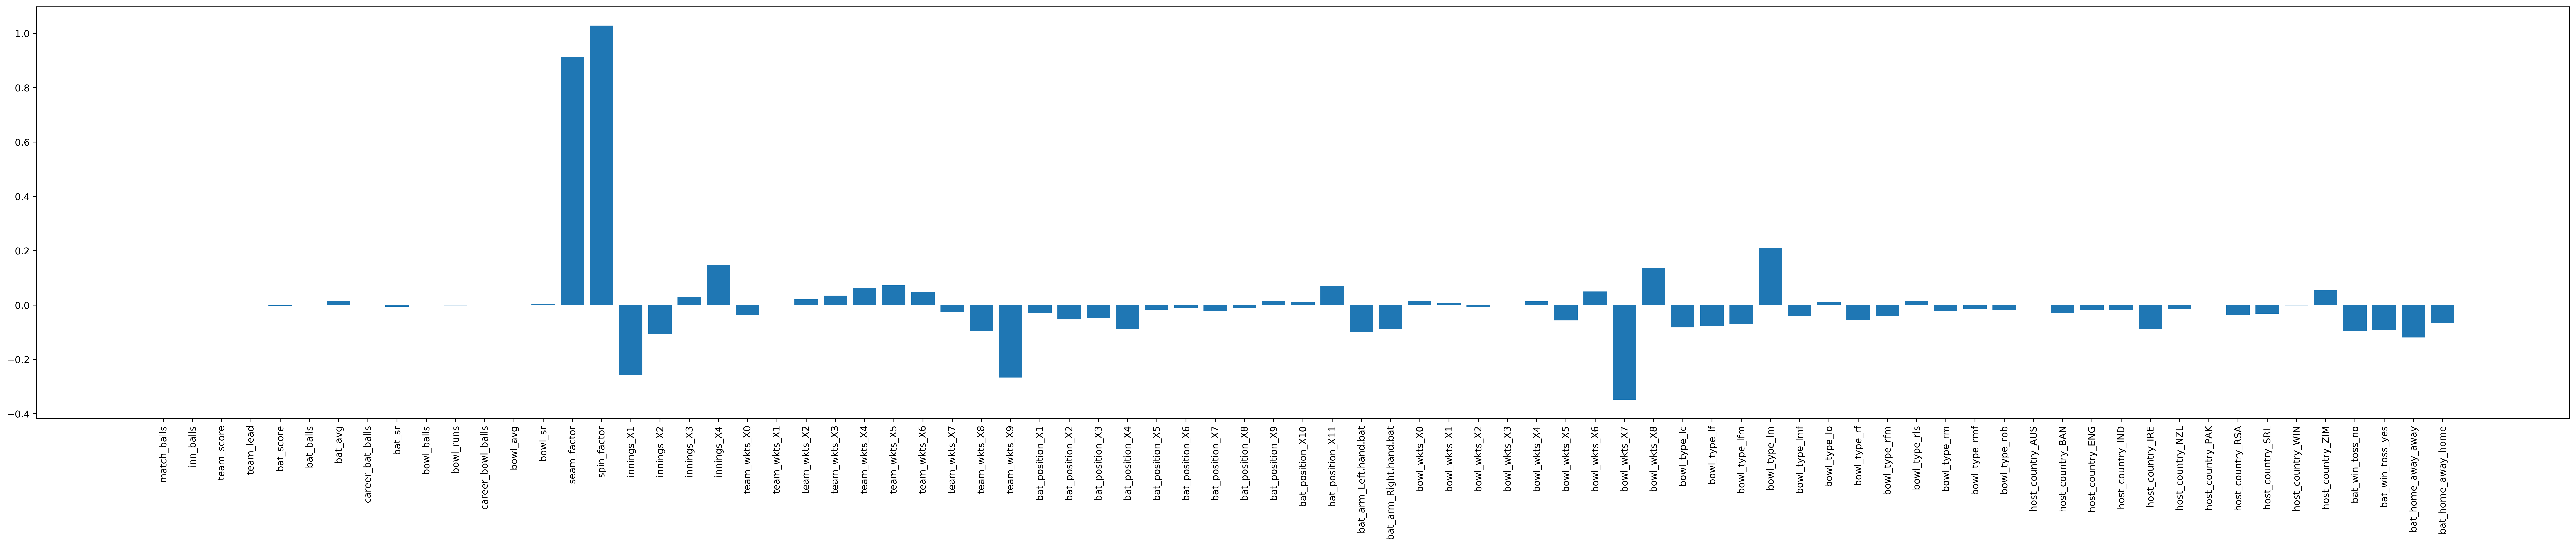

In [73]:

#Evaluate on test set
score = fit_logit.score(x_test, y_test_unencode)
print("Test score of logistic regression: %.4f" % score)

# Feature importance
importance = fit_logit.coef_[0]

plt.bar(features, importance)
plt.xticks(rotation='vertical')
plt.show()

['W' 'no']


Text(0, 0.5, 'Coefficient')

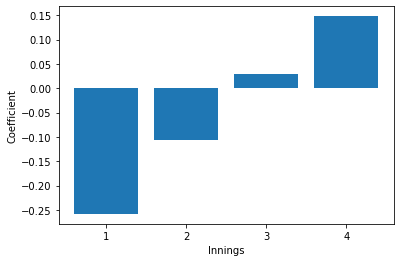

In [56]:
print(model_logit.classes_)

# Plotting some interesting relationships
plt.bar([1, 2, 3, 4], importance[[16, 17, 18, 19]])
plt.xticks([1,2,3,4])
plt.xlabel("Innings")
plt.ylabel("Coefficient")